In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

**TASK: Run the cell below to read in the data.**

In [154]:
df = pd.read_csv('heart.csv')

In [155]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [156]:
df['target'].unique()

array([0, 1], dtype=int64)

### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

**TASK: Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [245]:
df.fbs.unique()

array([0, 1], dtype=int64)

In [158]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [159]:
# CODE HERE

In [160]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

<Axes: xlabel='thalach', ylabel='target'>

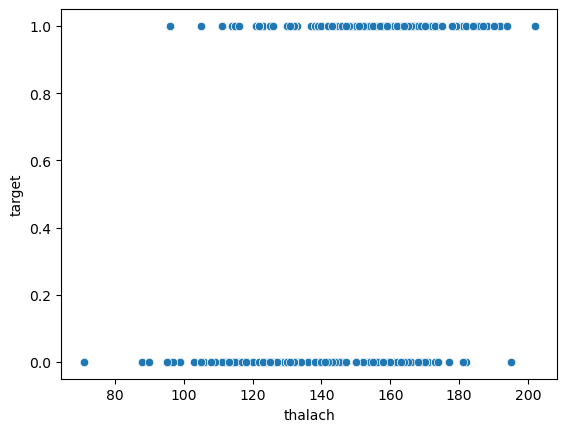

In [161]:
sns.scatterplot(data=df,x='thalach',y='target')

In [162]:
# CODE HERE!

<Axes: xlabel='target', ylabel='count'>

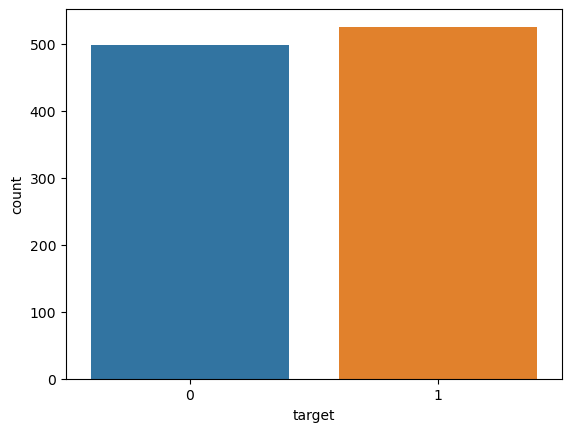

In [163]:
sns.countplot(df,x='target')

**TASK: Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

In [164]:
# CODE HERE

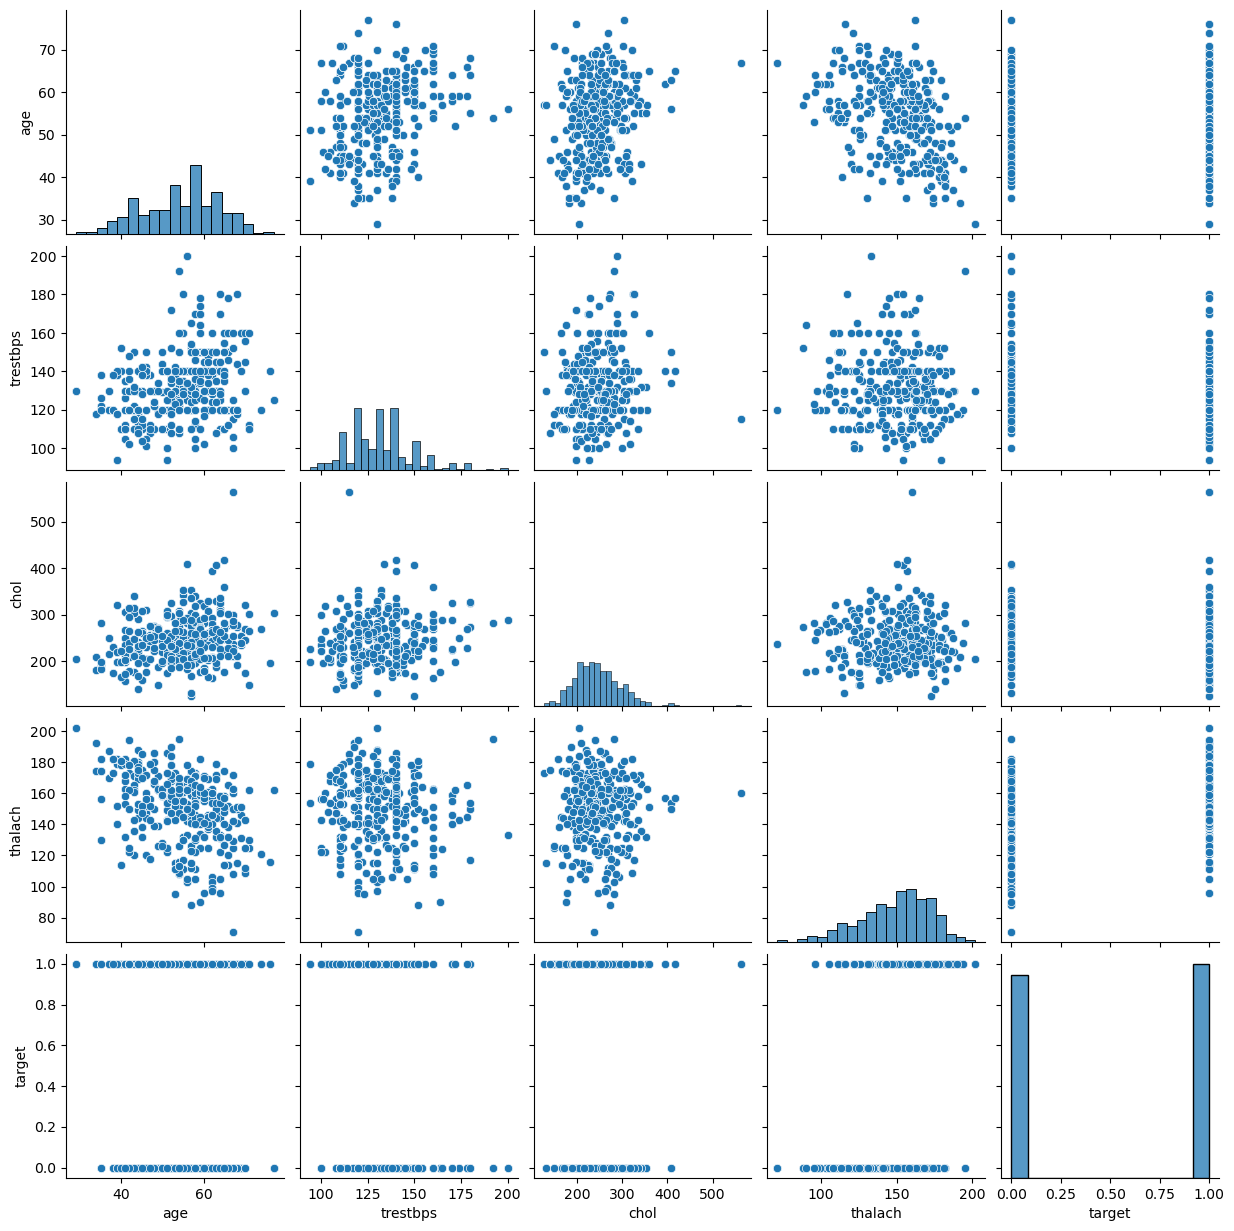

In [165]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']])

**TASK: Create a heatmap that displays the correlation between all the columns.**

In [166]:
# CODE HERE

<Axes: >

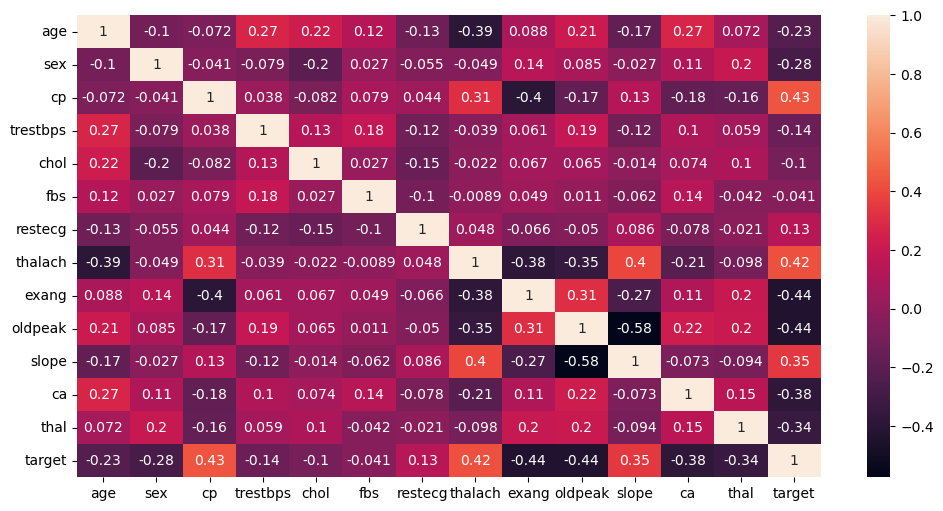

In [167]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [168]:
# CODE HERE

In [169]:
x=df.drop('target',axis=1)
y=df.target

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [170]:
# CODE HERE

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.1)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [173]:
# CODE HERE

In [174]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [175]:
scaler.fit(x_train)

StandardScaler()

In [176]:
x_train=scaler.transform(x_train)

In [177]:
x_test=scaler.transform(x_test)

In [196]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [206]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [207]:
y_preds=model.predict(x_test)

In [214]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [209]:
accuracy=accuracy_score(y_test,y_preds)
accuracy

0.9902912621359223

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [218]:
cm=confusion_matrix(y_test,y_preds)

In [217]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        53

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



<Axes: >

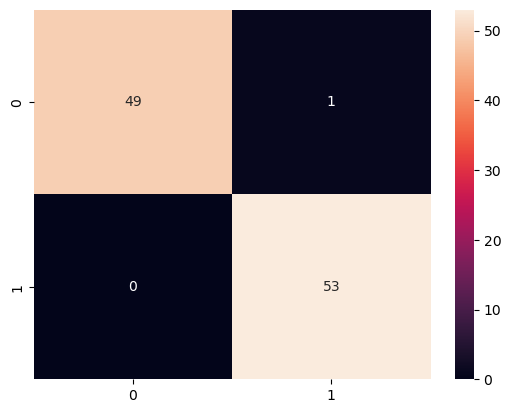

In [219]:
sns.heatmap(cm,annot=True)

In [220]:
import pickle

In [243]:
with open('heart disease model.pkl', 'wb') as file:
    pickle.dump(model, file)